0. DATASETS

In [ ]:
! gdown --id 1E8OTtNK_UNSAdmkg3OuB0k2FsKKF9QpY
! gdown --id 1-pm6_kvT9CBrYER40uIkRiG0KMlHnH7L
! gdown --id 1oiVQignVg1wvE1LXKFvOLHPl0P8GNSDp

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1E8OTtNK_UNSAdmkg3OuB0k2FsKKF9QpY
To: /content/train.csv
100% 98.6M/98.6M [00:01<00:00, 65.5MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-pm6_kvT9CBrYER40uIkRiG0KMlHnH7L
To: /content/test.csv
100% 25.1M/25.1M [00:00<00:00, 61.7MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
submit_data = pd.read_csv("submit.csv")

In [ ]:
test_data = test_data.join(submit_data["label"])

In [ ]:
# Removing null values
train_data.dropna(inplace=True)
train_data.drop(train_data.loc[train_data['text']==" "].index, inplace=True)
train_data.drop(train_data.loc[train_data['text']=="  "].index, inplace=True)
train_data.drop(train_data.loc[train_data['text']=="\n"].index, inplace=True)

# Resetting index
train_data.reset_index(inplace=True)

In [ ]:
train_data= train_data.apply(lambda x: x.astype(str).str.lower())

In [ ]:
train_data = train_data.drop(columns=["id", "index"])

In [ ]:
# Removing null values
test_data.dropna(inplace=True)
test_data.drop(test_data.loc[test_data['text']==" "].index, inplace=True)
test_data.drop(test_data.loc[test_data['text']=="  "].index, inplace=True)
test_data.drop(test_data.loc[test_data['text']=="\n"].index, inplace=True)

# Resetting index
test_data.reset_index(inplace=True)

In [ ]:
test_data= test_data.apply(lambda x: x.astype(str).str.lower())

In [ ]:
test_data = test_data.drop(columns=["id","index"])

In [ ]:
!pip install --upgrade --no-cache-dir gdown

In [ ]:
! gdown --id 1pGkEyDelD7Lp7yhFML9Dt1oo-91Mqf9H
! gdown --id 1DYVzeYjjTTeHtazHfKD9FTx57h-77bkC

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1pGkEyDelD7Lp7yhFML9Dt1oo-91Mqf9H
To: /content/pre_train.csv
100% 280M/280M [00:01<00:00, 248MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1DYVzeYjjTTeHtazHfKD9FTx57h-77bkC
To: /content/pre_test.csv
100% 70.2M/70.2M [00:00<00:00, 76.4MB/s]


In [ ]:
#nulls
! gdown --id 1-31BvAJpyVent7RyJWg2lveqvNBKWsYr
! gdown --id 1a-OHeeWwuuCPKFbl2EfopQHD2erJ3KwK

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-31BvAJpyVent7RyJWg2lveqvNBKWsYr
To: /content/pre_test_withnull.csv
100% 79.3M/79.3M [00:00<00:00, 84.4MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1a-OHeeWwuuCPKFbl2EfopQHD2erJ3KwK
To: /content/pre_train_withnull.csv
100% 316M/316M [00:02<00:00, 136MB/s]


In [ ]:
transformed_df = pd.read_csv("pre_train.csv")
transformed_df_test = pd.read_csv("pre_test.csv")

In [ ]:
transformed_df = pd.read_csv("pre_train_withnull.csv")
transformed_df_test = pd.read_csv("pre_test_withnull.csv")

In [ ]:
X_test = transformed_df_test.values
y_test = test_data["label"].values 

In [ ]:
transformed_df.shape

(20800, 3000)

1. CROSS VALIDATE

In [ ]:
#stratified Kfold (k=5) split for training data

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

X = transformed_df.values
y = train_data["label"].values.astype('int')

X_train=[]
X_val=[]
y_train=[]
y_val=[]

for train_index, test_index in skf.split(X, y):
  X_train.append(X[train_index])
  X_val.append(X[test_index]) 
  y_train.append(y[train_index])
  y_val.append(y[test_index])

In [ ]:
y[:10]

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0])

2. LEARNING CURVE

2.1 Logistic Regression

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
train_sizes = [k for k in range(1000, 14001, 1000)]

In [ ]:
#Optimal parameters:
#'C', 838.1663841715371), ('fit_intercept', True), ('max_iter', 760), ('penalty', 'l2'), ('tol', 0.00033408696968072204), ('warm_start', False)

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = LogisticRegression(C=838, max_iter=760, penalty='l2', tol=0.0003), X = X, y = y, train_sizes = train_sizes, cv = 5, scoring='accuracy')

In [ ]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

In [ ]:
import matplotlib.pyplot as plt

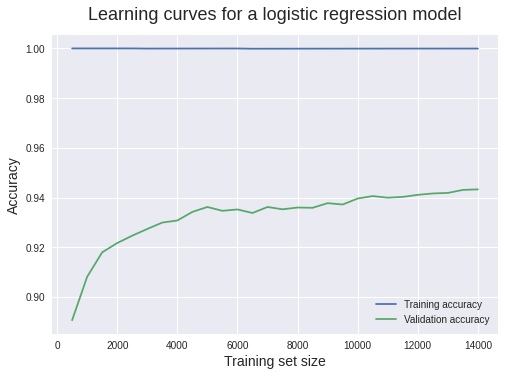

In [ ]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a logistic regression model', fontsize = 18, y = 1.03)
plt.legend()

2.2 Logistic Regression SGD

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
#optimal parameters:
#('alpha', 1e-05), ('early_stopping', True), ('eta0', 10.0), ('fit_intercept', True), ('l1_ratio', 0.0), ('learning_rate', 'adaptive'), ('loss', 'log'), ('max_iter', 1000), ('n_iter_no_change', 15), ('penalty', 'l2'), ('power_t', 0.0), ('tol', 0.0001), ('validation_fraction', 0.3), ('warm_start', True)

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = SGDClassifier(alpha=1e-5, early_stopping=True, eta0=10, l1_ratio=0.0, learning_rate='adaptive', loss='log', n_iter_no_change=15, penalty='l2', power_t=0.0, tol=0.0001, validation_fraction=0.3, warm_start=True), X = X, y = y, train_sizes = train_sizes, cv = 5, scoring='accuracy')

In [ ]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

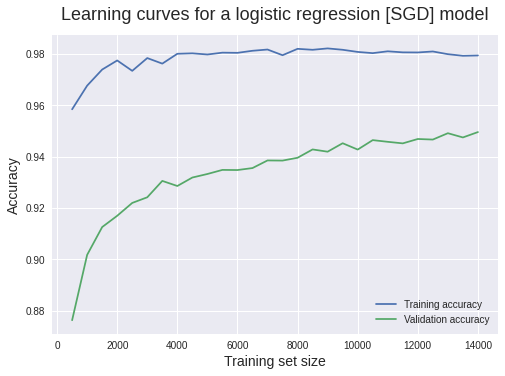

In [ ]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a logistic regression [SGD] model', fontsize = 18, y = 1.03)
plt.legend()

2.3 Passive Aggressive

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [ ]:
#optimal parameters:
#('C', 654.8189998748911), ('early_stopping', True), ('fit_intercept', True), ('max_iter', 8358), ('n_iter_no_change', 13), ('tol', 0.008517734372197392), ('validation_fraction', 0.2), ('warm_start', False)

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = PassiveAggressiveClassifier(C=654.8, early_stopping=True, max_iter=8358, n_iter_no_change=13, tol=0.0085, validation_fraction=0.2), X = X, y = y, train_sizes = train_sizes, cv = 5, scoring='accuracy')

In [ ]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

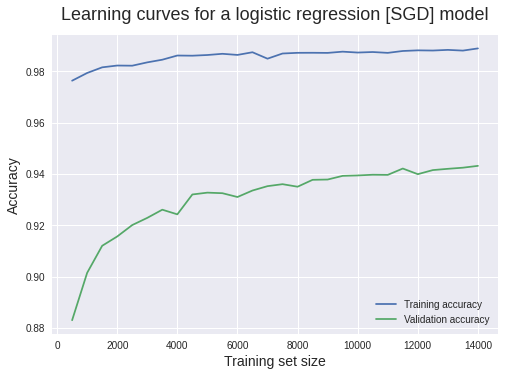

In [ ]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a logistic regression [SGD] model', fontsize = 18, y = 1.03)
plt.legend()

2.4 KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#optimal parameters:
#('algorithm', 'auto'), ('leaf_size', 47), ('n_neighbors', 16), ('p', 3), ('weights', 'distance')

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = KNeighborsClassifier(leaf_size=47, n_neighbors=16, p=3, weights='distance'), X = X, y = y, train_sizes = train_sizes, cv = 5, scoring='accuracy')

In [ ]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

In [ ]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for KNN', fontsize = 18, y = 1.03)
plt.legend()

XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = XGBClassifier(objective = 'binary:logistic',eval_metric = 'auc',silent=1,tree_method='gpu_hist', alpha= 6, colsample_bytree=0.9945, eta=0.079, gamma=3.89178, reg_lambda=9, max_delta_step=5, max_depth=10, min_child_weight=9, n_estimators=100, subsample=0.865), X = X, y = y, train_sizes = train_sizes, cv = 5, scoring='accuracy')

In [ ]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

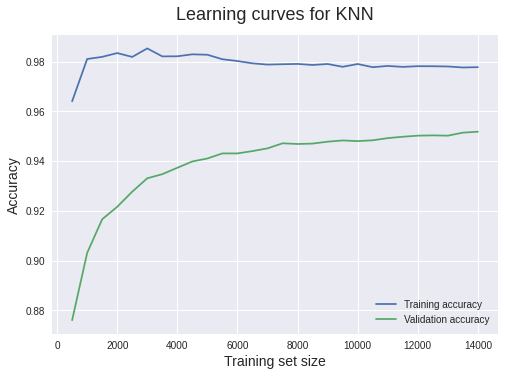

In [ ]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for KNN', fontsize = 18, y = 1.03)
plt.legend()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
len(y)

20800

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = RandomForestClassifier(n_estimators=200,criterion='entropy'), X = X, y = y, train_sizes = train_sizes, cv = 5, scoring='accuracy')

In [ ]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

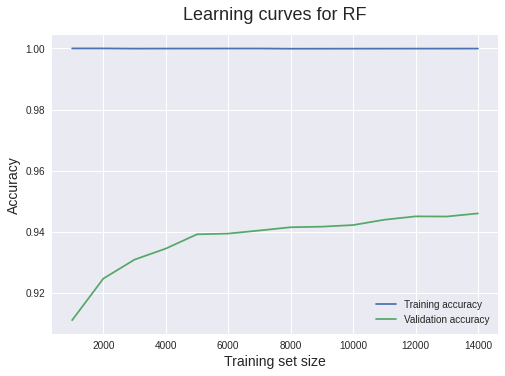

In [ ]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for RF', fontsize = 18, y = 1.03)
plt.legend()